# Maschinelles Lernen - Abschlussarbeit

Verwendung von RandomForest auf das Dataset "Breast Cancer"

Vorgelegt von Justus Braitinger und Lennart Theiler

### Inhaltsverzeichnis
1. A
2. B
3. C
4. D
5. F
6. G

### 1. A
Als erstes haben wir alle benötigten Libraries importiert und anschließend das Dataset in einen Dataframe geladen

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier 

In [4]:
df = pd.read_csv(r'../Datensätze/breas_cancer_data.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Nachdem wir uns einen ersten Überblick über das Dataset verschafft haben, haben wir es bereinigt und die Label von string zu integer konvertiert. 

In [5]:
#Bereinigen des Datensets
#Alle NaN werden gedroppt
#Konvertieren der Diagnose Strings in Integer
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df = df.dropna(axis=1, how='all')

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


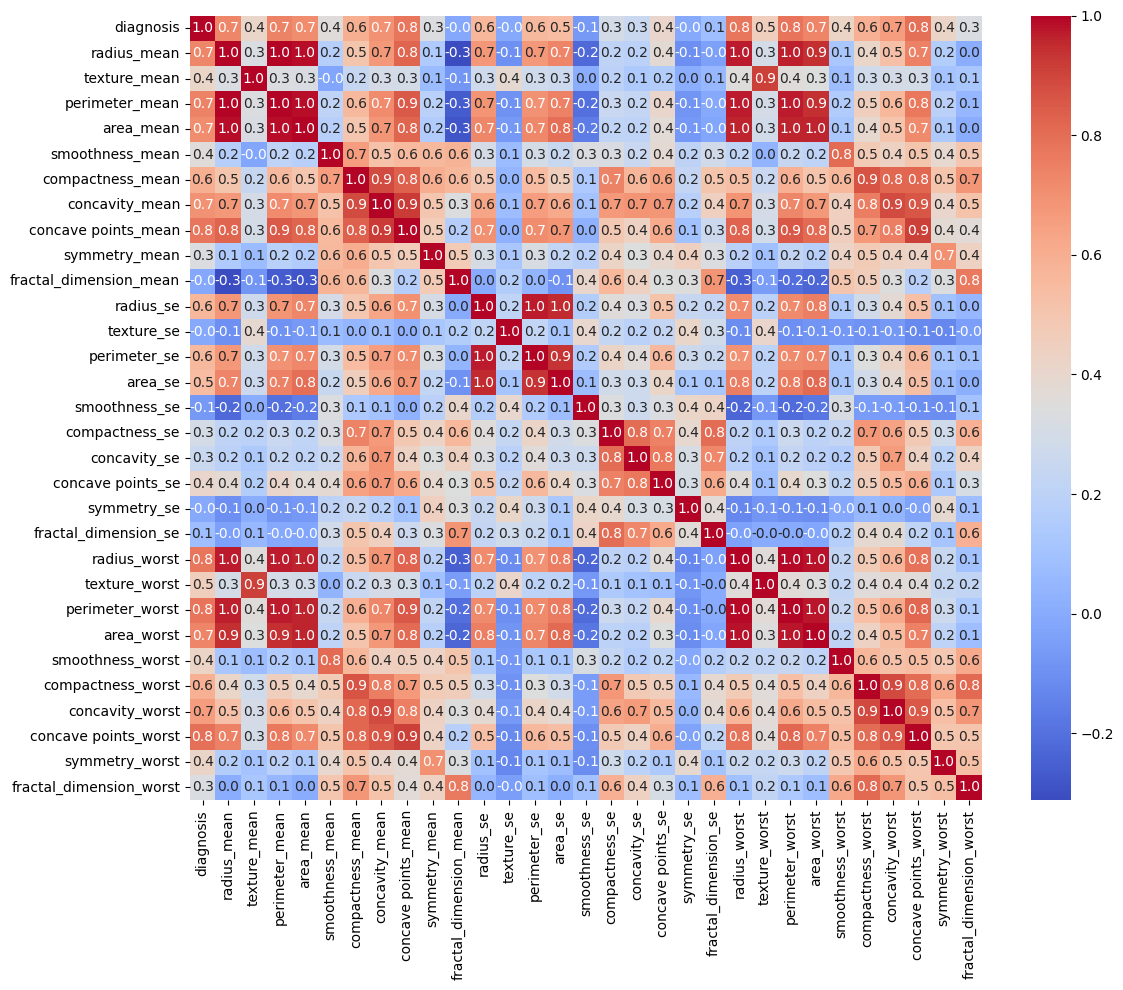

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.tight_layout()

plt.show()

Nachdem wir uns einen guten Überblick über das Dataset verschafft haben und Schlüsse aus der Korrelation verschiedener Features ziehen konnten. Somit sehen wir, dass radius_mean, perimeter_mean und area_mean eine hohe Korrelation haben. Das bedeutet, dass diese Daten redundant sind und für ein ineffizientes Training sorgen. Wir können redundante Daten entfernen, um ein effizienteres Training zu gewährleisten, ohne an Genauigkeit zu verlieren.
Entfernt werden können also:

Da redundant zu radius_mean:
1. perimeter_mean
2. area_mean

Da redundant zu radius_worst:
1. perimeter_worst
2. area_worst

Da kaum Korrelation zu diagnosis:
1. symmetrie_se
2. fractal_dimension_mean
3. fractal_dimension_se


In [ ]:
#TODO: Entfernen und Ergebnisse verlgeichen

In [16]:
Diagnosis = df.iloc[:,0]
Data = df.iloc[:,1:]

X_train, X_test ,y_train,y_test = train_test_split(Data, Diagnosis, random_state = 42, test_size = 0.3)



In [63]:
# MOdell fitten
Random_Forest = RandomForestClassifier(max_features = "log2")
Random_Forest.fit(X_train, y_train)
Random_Forest_Predict = Random_Forest.predict(X_test)

In [64]:
Accuracy_Random_Forest = Random_Forest.score(X_test,y_test)
print(Accuracy_Random_Forest)

0.9707602339181286


In [65]:
print(Random_Forest.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


[Text(0.6967592592592593, 0.95, 'X[27] <= 0.142\ngini = 0.486\nsamples = 252\nvalue = [232, 166]\nclass = y[0]'),
 Text(0.4675925925925926, 0.85, 'X[28] <= 0.166\ngini = 0.228\nsamples = 167\nvalue = [225, 34]\nclass = y[0]'),
 Text(0.4305555555555556, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 4]\nclass = y[1]'),
 Text(0.5046296296296297, 0.75, 'X[3] <= 697.8\ngini = 0.208\nsamples = 165\nvalue = [225, 30]\nclass = y[0]'),
 Text(0.3425925925925926, 0.65, 'X[23] <= 889.85\ngini = 0.061\nsamples = 147\nvalue = [214, 7]\nclass = y[0]'),
 Text(0.24074074074074073, 0.55, 'X[12] <= 4.118\ngini = 0.045\nsamples = 145\nvalue = [213, 5]\nclass = y[0]'),
 Text(0.14814814814814814, 0.45, 'X[3] <= 562.0\ngini = 0.037\nsamples = 142\nvalue = [211, 4]\nclass = y[0]'),
 Text(0.07407407407407407, 0.35, 'X[20] <= 14.485\ngini = 0.011\nsamples = 117\nvalue = [176, 1]\nclass = y[0]'),
 Text(0.037037037037037035, 0.25, 'gini = 0.0\nsamples = 107\nvalue = [162, 0]\nclass = y[0]'),
 Text(0.111111111111111

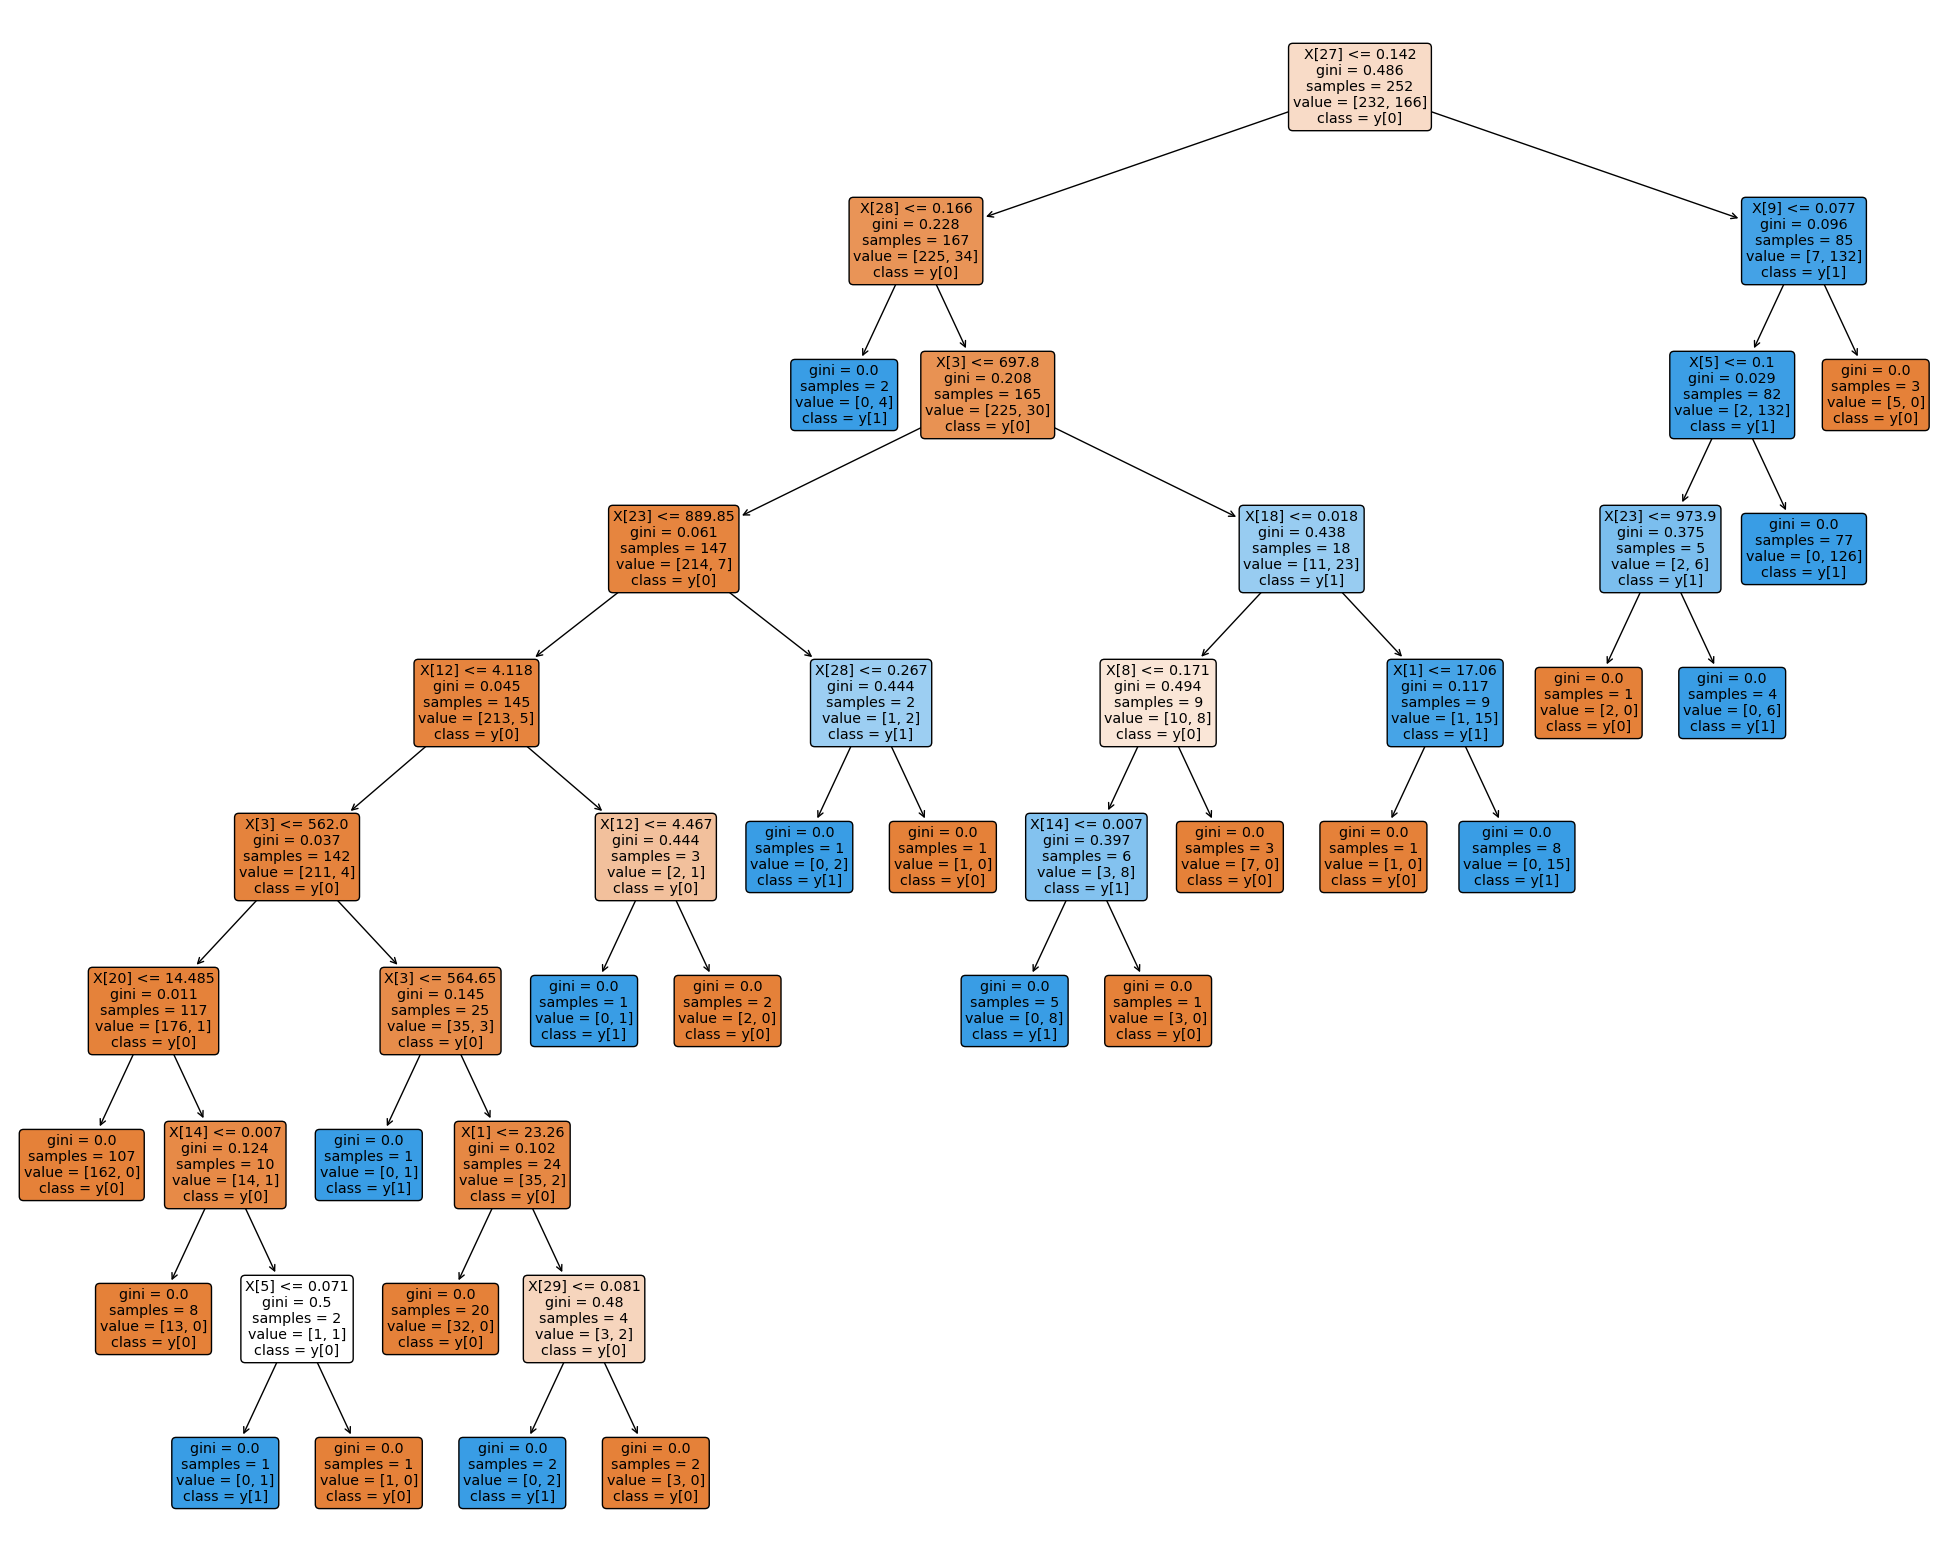

In [66]:
# Erzeuge eine Figur mit einer geeigneten Größe
fig = plt.figure(figsize=(25, 20))
plt.tight_layout()


# Visualisiere den Entscheidungsbaum
tree.plot_tree(Random_Forest.estimators_[1], filled = True , rounded = True, class_names = True)

In [40]:
n_estimators = list(range(10,300,20))
# Max _features steuert wie viele Features zufällig ausgewählt werden sollen umd einen besten Split am Knoten zu bekommen
max_features = ['auto','sqrt','log2']
# Max_depth ist die maximale Tiefe / Ebene
max_depth = [2,4]
#min_sample_split bestimmt wann der Knoten nicht weiter aufgeteilt wird

min_sample_split = [2,5]

min_sample_leaf = [1,2]

bootstrap = [True, False]

criterion = ['gini', 'entropy']
print(n_estimators)

[10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290]


In [41]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'bootstrap': bootstrap,
    'min_samples_leaf': min_sample_leaf,
    'min_samples_leaf' : min_sample_split,
    'criterion' : criterion
    
}


In [42]:
Rf = RandomForestClassifier()

Rf_Grid = GridSearchCV(estimator = Rf, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)

Rf_Grid.fit(X_train, y_train)
best_params  = Rf_Grid.best_params_
print(best_params)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


C:\Users\justu\anaconda\envs\desired-env-name\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 270}


In [43]:

# Versuch, Random Forest mit den getunten Parametern zu erstellen
RF_Tune = RandomForestClassifier(**best_params)
RF_Tune.fit(X_train, y_train)

# Vorhersagen und Genauigkeit des getunten Modells auswerten
y_Tune_predict = RF_Tune.predict(X_test)
RF_Tune_Accuracy = RF_Tune.score(X_test, y_test)
print(RF_Tune_Accuracy)

C:\Users\justu\anaconda\envs\desired-env-name\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9707602339181286


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definiere deinen Parameter-Raum (param_grid) hier

# Instanziiere RandomForestClassifier
Rf_Random = RandomForestClassifier()

# Instanziiere RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=Rf_Random, param_distributions=param_grid, cv=3)

# Fitte das RandomizedSearchCV-Objekt
random_search.fit(X_train, y_train)

# Greife auf die besten Parameter zu
best_params_random = random_search.best_params_

print(best_params)


C:\Users\justu\anaconda\envs\desired-env-name\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\justu\anaconda\envs\desired-env-name\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\justu\anaconda\envs\desired-env-name\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 270}


In [58]:
RF_Tune_Random = RandomForestClassifier(**best_params_random)
RF_Tune_Random.fit(X_train, y_train)

# Vorhersagen und Genauigkeit des getunten Modells auswerten
y_Tune_predict = RF_Tune_Random.predict(X_test)
RF_Tune_Random_Accuracy = RF_Tune_Random.score(X_test, y_test)
print(RF_Tune_Random_Accuracy)

C:\Users\justu\anaconda\envs\desired-env-name\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9649122807017544
